In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
# 1. Cargar y Preparar los Datos
def leer_datos(ruta):
    df = pd.read_csv(ruta, sep=',')
    return df


In [11]:
# Cargar y preparar los datos
filename = 'data_evaluacion.csv'  # Ruta del archivo caracteristicas_vinos.csv
data = pd.read_csv(filename)

In [12]:
# Verificar si hay valores nulos en las columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns


In [13]:
print("Valores nulos en las columnas numéricas:")
print(data[numeric_columns].isnull().sum())

print("Valores nulos en las columnas categóricas:")
print(data[categorical_columns].isnull().sum())

Valores nulos en las columnas numéricas:
39       0
77516    0
13       0
2174     0
0        0
40       0
dtype: int64
Valores nulos en las columnas categóricas:
State-gov        0
Bachelors        0
Never-married    0
Adm-clerical     0
Not-in-family    0
White            0
Male             0
United-States    0
<=50K            0
dtype: int64


In [14]:
# Renombrar las columnas del DataFrame
data.rename(columns={
    '39': 'Age',
    '77516': 'HoursPerWeek',
    '13': 'EducationLevel',
    '2174': 'PostalCode',
    '0': 'Indicator',
    '40': 'MaxHours',
    '<=50K': 'salary'
}, inplace=True)

In [15]:
# Verificar el renombramiento de las columnas
print("Columnas renombradas:")
print(data.head(10))

Columnas renombradas:
   Age         State-gov  HoursPerWeek     Bachelors  EducationLevel  \
0   50  Self-emp-not-inc         83311     Bachelors              13   
1   38           Private        215646       HS-grad               9   
2   53           Private        234721          11th               7   
3   28           Private        338409     Bachelors              13   
4   37           Private        284582       Masters              14   
5   49           Private        160187           9th               5   
6   52  Self-emp-not-inc        209642       HS-grad               9   
7   31           Private         45781       Masters              14   
8   42           Private        159449     Bachelors              13   
9   37           Private        280464  Some-college              10   

           Never-married       Adm-clerical  Not-in-family  White    Male  \
0     Married-civ-spouse    Exec-managerial        Husband  White    Male   
1               Divorced  Handl

In [16]:
# Cambiar el nombre de la columna
data.rename(columns={'<=50K': 'salary'}, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar el cambio
print(data.head())

   Age         State-gov  HoursPerWeek  Bachelors  EducationLevel  \
0   50  Self-emp-not-inc         83311  Bachelors              13   
1   38           Private        215646    HS-grad               9   
2   53           Private        234721       11th               7   
3   28           Private        338409  Bachelors              13   
4   37           Private        284582    Masters              14   

        Never-married       Adm-clerical  Not-in-family  White    Male  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   PostalCode  Indicator  MaxHours  United-States salary  
0           0          0        13  United-States  <=50K  
1           0         

In [17]:
# Actualizar las columnas categóricas después de renombrar
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

In [18]:
# 2. Codificar Columnas Categóricas
categorical_columns = data.select_dtypes(exclude=[np.number]).columns


In [19]:
# Codificar columnas categóricas
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])


In [20]:
# Verificar las primeras filas después de la codificación
data.head(40)

,Age,State-gov,HoursPerWeek,Bachelors,EducationLevel,Never-married,Adm-clerical,Not-in-family,White,Male,PostalCode,Indicator,MaxHours,United-States,salary
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
6,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
7,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
8,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1
9,37,4,280464,15,10,2,4,0,2,1,0,0,80,39,1


In [21]:
# 3. Normalización de Datos
# Normalización de los datos
scaler = StandardScaler()
numeric_columns = ['Age', 'HoursPerWeek', 'EducationLevel', 'PostalCode', 'Indicator', 'MaxHours']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [22]:
# Mostrar las primeras 5 filas después de la normalización
print(data.head())


        Age  State-gov  HoursPerWeek  Bachelors  EducationLevel  \
0  0.828300          6     -1.007127          9        1.136539   
1 -0.046940          4      0.246012         11       -0.419313   
2  1.047111          4      0.426642          1       -1.197239   
3 -0.776308          4      1.408510          9        1.136539   
4 -0.119877          4      0.898798         12        1.525502   

   Never-married  Adm-clerical  Not-in-family  White  Male  PostalCode  \
0              2             4              0      4     1   -0.144799   
1              0             6              1      4     1   -0.144799   
2              2             6              0      2     1   -0.144799   
3              2            10              5      2     0   -0.144799   
4              2             4              5      4     0   -0.144799   

   Indicator  MaxHours  United-States  salary  
0  -0.217129 -2.213010             39       0  
1  -0.217129 -0.034087             39       0  
2  -0.21

In [25]:
# 4. Clustering con KMeans
# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data[numeric_columns])
labels = kmeans.labels_

c:\Users\Adali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
# Añadir etiquetas de clúster a los datos originales
data['Cluster'] = labels

In [27]:
# Mostrar las primeras 5 filas después de agregar los clusters
print(data.head())

        Age  State-gov  HoursPerWeek  Bachelors  EducationLevel  \
0  0.828300          6     -1.007127          9        1.136539   
1 -0.046940          4      0.246012         11       -0.419313   
2  1.047111          4      0.426642          1       -1.197239   
3 -0.776308          4      1.408510          9        1.136539   
4 -0.119877          4      0.898798         12        1.525502   

   Never-married  Adm-clerical  Not-in-family  White  Male  PostalCode  \
0              2             4              0      4     1   -0.144799   
1              0             6              1      4     1   -0.144799   
2              2             6              0      2     1   -0.144799   
3              2            10              5      2     0   -0.144799   
4              2             4              5      4     0   -0.144799   

   Indicator  MaxHours  United-States  salary  Cluster  
0  -0.217129 -2.213010             39       0        1  
1  -0.217129 -0.034087             39 

In [28]:
# 5. Preparar Datos para DecisionTreeClassifier
# Separar características y variable objetivo
X = data.drop(columns=['salary', 'Cluster'])
y = data['salary']

In [29]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
# 6. Entrenar y Evaluar el Modelo DecisionTreeClassifier
# Entrenar el modelo DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Realizar predicciones
y_pred = dt_model.predict(X_test)


In [32]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8159421278918992
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     11166
           1       0.61      0.63      0.62      3487

    accuracy                           0.82     14653
   macro avg       0.75      0.75      0.75     14653
weighted avg       0.82      0.82      0.82     14653

Confusion Matrix:
[[9767 1399]
 [1298 2189]]


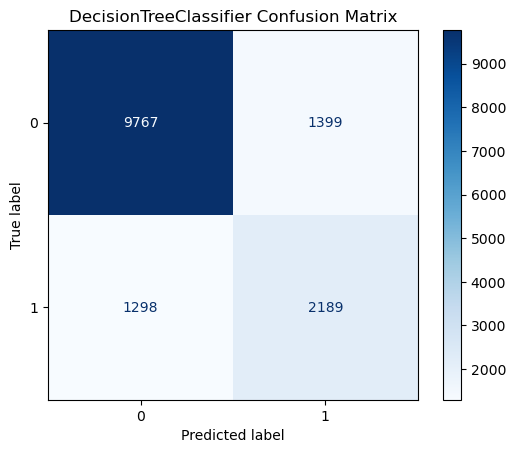

In [33]:
# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('DecisionTreeClassifier Confusion Matrix')
plt.show()

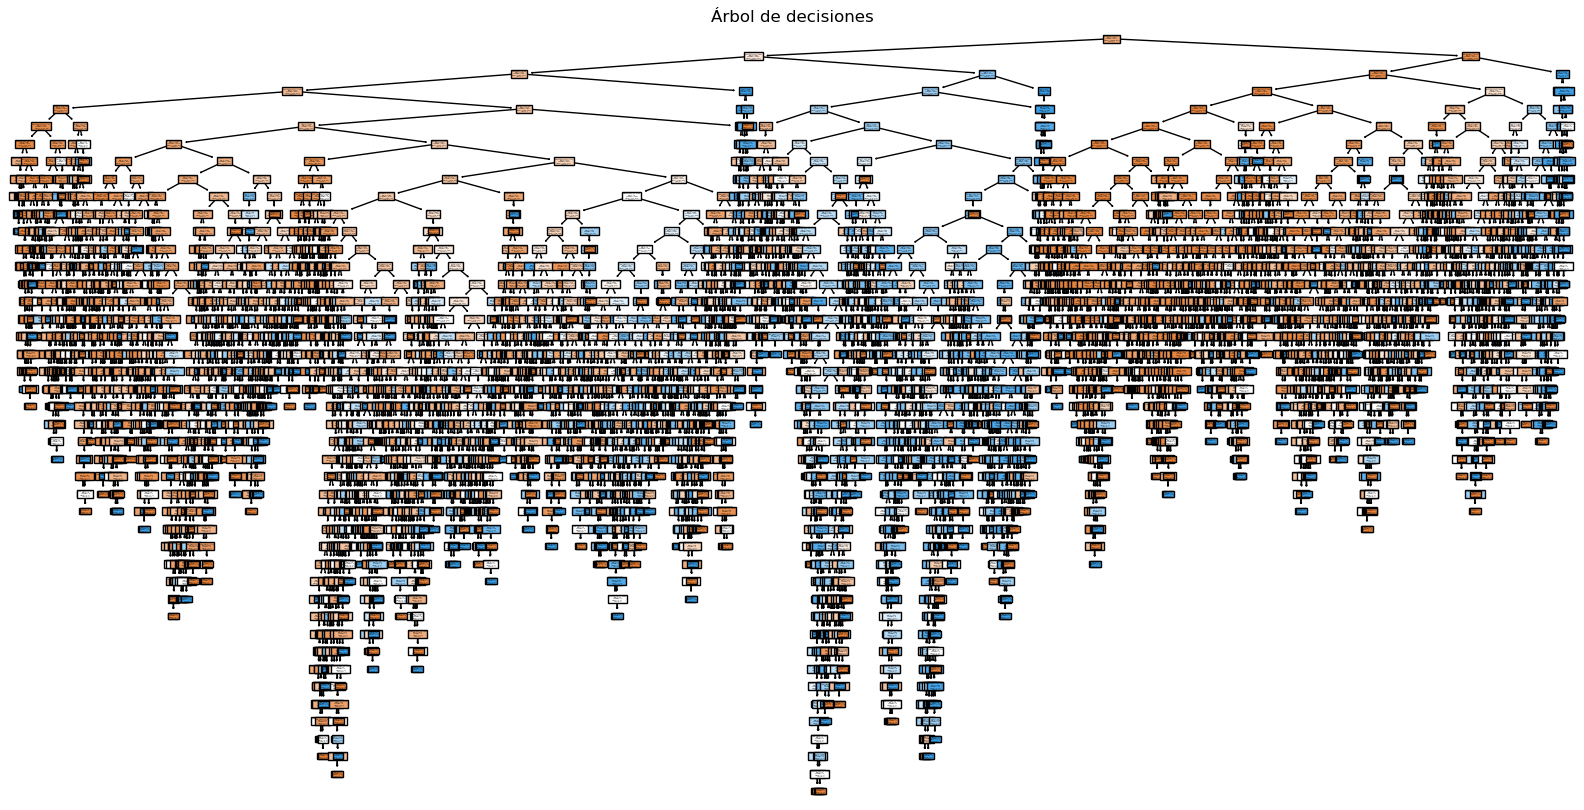

In [34]:
# Graficar el árbol de decisiones
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.title("Árbol de decisiones")
plt.show()

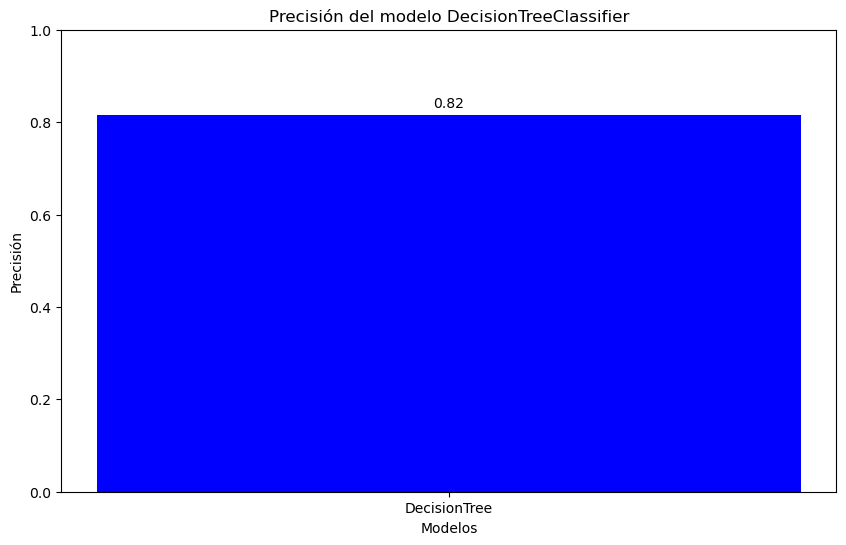

In [35]:
# Graficar los resultados del DecisionTreeClassifier
plt.figure(figsize=(10, 6))
plt.bar(['DecisionTree'], [accuracy], color='blue')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Precisión del modelo DecisionTreeClassifier')
plt.ylim([0, 1])
plt.text(0, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom')
plt.show()

In [36]:
# Conclusiones para DecisionTreeClassifier
print("Conclusiones DecisionTreeClassifier:")
print(f"El modelo DecisionTreeClassifier tiene una precisión de {accuracy:.2f}")

Conclusiones DecisionTreeClassifier:
El modelo DecisionTreeClassifier tiene una precisión de 0.82
